## Riya Raut

### Roll No.- DS24MS23

## Airline Passenger Referral Prediction

### Problem Statement

Airlines is leveraging passenger review data from 2006 to 2019 to develop a predictive model that identifies which customers are likely to recommend the airline. This initiative aims to enhance customer experience, guide targeted service improvements, inform strategic marketing, and strengthen Airline competitive edge. By understanding key factors influencing referrals—such as comfort, service quality, and value—IndiGo can make data-driven decisions to boost customer satisfaction and brand loyalty.

### Importing necessary libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [9]:
df = pd.read_csv("https://raw.githubusercontent.com/Riya-712/Airline_classification/refs/heads/main/Airline_data.csv")

In [10]:
df.head()

,Unnamed: 0,airline,overall,author,review_date,customer_review,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,aircraft_brands
0,7,Turkish Airlines,10.0,Zeshan Shah,6th May 2019,âœ… Trip Verified | Flew on Turkish Airlines I...,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive,NaN
1,15,Turkish Airlines,2.0,S Gonser,29th April 2019,âœ… Trip Verified | Basel to Cape Town via Ist...,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive,Boeing
2,17,Turkish Airlines,6.0,Sami Osman,29th April 2019,Not Verified | Abu Dhabi to Luxembourg via Ist...,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive,Boeing
3,19,Turkish Airlines,1.0,Norka Idalia Orlando,28th April 2019,âœ… Trip Verified | The experience with Turkis...,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative,NaN
4,29,Turkish Airlines,2.0,Trevor Khurana,24th April 2019,âœ… Trip Verified | Houston to Kiev via Istanb...,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive,Boeing


In [11]:
df.shape

(14215, 19)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       14215 non-null  int64  
 1   airline          14215 non-null  object 
 2   overall          14215 non-null  float64
 3   author           14215 non-null  object 
 4   review_date      14215 non-null  object 
 5   customer_review  14215 non-null  object 
 6   aircraft         14215 non-null  object 
 7   traveller_type   14215 non-null  object 
 8   cabin            14215 non-null  object 
 9   date_flown       14215 non-null  object 
 10  seat_comfort     14215 non-null  float64
 11  cabin_service    14215 non-null  float64
 12  food_bev         14215 non-null  float64
 13  entertainment    14215 non-null  float64
 14  ground_service   14215 non-null  float64
 15  value_for_money  14215 non-null  float64
 16  recommended      14215 non-null  object 
 17  sentiment   

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,14215.0,56726.524376,36332.796264,7.0,25996.0,54269.0,85870.0,131712.0
overall,14215.0,6.483152,3.050922,1.0,4.0,8.0,9.0,10.0
seat_comfort,14215.0,3.492719,1.336645,1.0,3.0,4.0,5.0,5.0
cabin_service,14215.0,3.742948,1.417064,1.0,3.0,4.0,5.0,5.0
food_bev,14215.0,3.318044,1.425094,1.0,2.0,4.0,5.0,5.0
entertainment,14215.0,3.333873,1.398894,1.0,2.0,4.0,5.0,5.0
ground_service,14215.0,3.468801,1.412519,1.0,2.0,4.0,5.0,5.0
value_for_money,14215.0,3.564756,1.402578,1.0,3.0,4.0,5.0,5.0


In [14]:
df.columns

Index(['Unnamed: 0', 'airline', 'overall', 'author', 'review_date',
       'customer_review', 'aircraft', 'traveller_type', 'cabin', 'date_flown',
       'seat_comfort', 'cabin_service', 'food_bev', 'entertainment',
       'ground_service', 'value_for_money', 'recommended', 'sentiment',
       'aircraft_brands'],
      dtype='object')

### Data Prepositioning

In [16]:
df.isnull().sum()

Unnamed: 0            0
airline               0
overall               0
author                0
review_date           0
customer_review       0
aircraft              0
traveller_type        0
cabin                 0
date_flown            0
seat_comfort          0
cabin_service         0
food_bev              0
entertainment         0
ground_service        0
value_for_money       0
recommended           0
sentiment             0
aircraft_brands    5706
dtype: int64

In [17]:
# Dropping the aircraft_brands column as it contains many null values
df.drop('aircraft_brands', axis = 1, inplace = True)

In [18]:
df.duplicated().sum()

0

In [19]:
# Dropping the columns which less likely to contribut to the dependent variable.
df.drop(columns=["Unnamed: 0", "author", "customer_review"], inplace=True)

In [20]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment
0,Turkish Airlines,10.0,6th May 2019,A330,Solo Leisure,Economy Class,April 2019,4.0,5.0,5.0,5.0,5.0,5.0,yes,positive
1,Turkish Airlines,2.0,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,April 2019,3.0,3.0,2.0,3.0,1.0,2.0,no,positive
2,Turkish Airlines,6.0,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,April 2019,2.0,3.0,3.0,3.0,3.0,3.0,yes,positive
3,Turkish Airlines,1.0,28th April 2019,A320 / A330,Solo Leisure,Economy Class,February 2019,1.0,1.0,1.0,1.0,1.0,1.0,no,negative
4,Turkish Airlines,2.0,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,March 2019,1.0,3.0,2.0,2.0,1.0,1.0,no,positive


In [21]:
df.shape

(14215, 15)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   airline          14215 non-null  object 
 1   overall          14215 non-null  float64
 2   review_date      14215 non-null  object 
 3   aircraft         14215 non-null  object 
 4   traveller_type   14215 non-null  object 
 5   cabin            14215 non-null  object 
 6   date_flown       14215 non-null  object 
 7   seat_comfort     14215 non-null  float64
 8   cabin_service    14215 non-null  float64
 9   food_bev         14215 non-null  float64
 10  entertainment    14215 non-null  float64
 11  ground_service   14215 non-null  float64
 12  value_for_money  14215 non-null  float64
 13  recommended      14215 non-null  object 
 14  sentiment        14215 non-null  object 
dtypes: float64(7), object(8)
memory usage: 1.6+ MB


In [23]:
for i in df.columns:
    print(i,"\n",df[i].unique(),"\n")

airline 
 ['Turkish Airlines' 'Qatar Airways' 'Emirates' 'Lufthansa'
 'KLM Royal Dutch Airlines' 'Virgin America' 'American Airlines'
 'Delta Air Lines' 'Southwest Airlines' 'United Airlines'
 'Jetblue Airways' 'Aegean Airlines' 'Aeroflot Russian Airlines'
 'Aeromexico' 'Air Canada' 'Air New Zealand' 'Alitalia' 'AirAsia'
 'Asiana Airlines' 'Avianca' 'Austrian Airlines' 'British Airways'
 'Brussels Airlines' 'China Eastern Airlines' 'China Southern Airlines'
 'Copa Airlines' 'Ethiopian Airlines' 'Egyptair' 'Finnair' 'Iberia'
 'ANA All Nippon Airways' 'easyJet' 'Korean Air' 'LATAM Airlines'
 'LOT Polish Airlines' 'Qantas Airways' 'Air France' 'Etihad Airways'
 'Pegasus Airlines' 'Royal Jordanian Airlines' 'Ryanair'
 'South African Airways' 'Saudi Arabian Airlines' 'TAP Portugal'
 'Eurowings' 'EVA Air' 'Royal Air Maroc' 'Singapore Airlines'
 'SAS Scandinavian' 'Swiss Intl Air Lines' 'Thai Airways' 'Air India'
 'Air Europa' 'Air Canada rouge' 'airBaltic' 'Air China'
 'Cathay Pacific Airway

#### Changing the data types

In [25]:
df['seat_comfort'] = df['seat_comfort'].astype(int)
df['cabin_service'] = df['cabin_service'].astype(int)
df['food_bev'] = df['food_bev'].astype(int)
df['entertainment'] = df['entertainment'].astype(int)
df['ground_service'] = df['ground_service'].astype(int)
df['value_for_money'] = df['value_for_money'].astype(int)
df['overall'] = df['overall'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14215 entries, 0 to 14214
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          14215 non-null  object
 1   overall          14215 non-null  int32 
 2   review_date      14215 non-null  object
 3   aircraft         14215 non-null  object
 4   traveller_type   14215 non-null  object
 5   cabin            14215 non-null  object
 6   date_flown       14215 non-null  object
 7   seat_comfort     14215 non-null  int32 
 8   cabin_service    14215 non-null  int32 
 9   food_bev         14215 non-null  int32 
 10  entertainment    14215 non-null  int32 
 11  ground_service   14215 non-null  int32 
 12  value_for_money  14215 non-null  int32 
 13  recommended      14215 non-null  object
 14  sentiment        14215 non-null  object
dtypes: int32(7), object(8)
memory usage: 1.2+ MB


#### Changing the data type and extracting month and year

In [28]:
df['date_flown'] = pd.to_datetime(df['date_flown'], errors = 'coerce')

In [29]:
import datetime as dt

df["year"] = df["date_flown"].dt.year
df["month"] = df["date_flown"].dt.month

In [30]:
# creating new columns of day, month and year
df["year"] = df["date_flown"].dt.year
df["month"] = df["date_flown"].dt.month

In [31]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,year,month
0,Turkish Airlines,10,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,positive,2019.0,4.0
1,Turkish Airlines,2,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,no,positive,2019.0,4.0
2,Turkish Airlines,6,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,yes,positive,2019.0,4.0
3,Turkish Airlines,1,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,no,negative,2019.0,2.0
4,Turkish Airlines,2,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,no,positive,2019.0,3.0


In [32]:
df.drop('airline', axis=1)
df.drop('aircraft', axis=1)
df.drop('date_flown', axis=1)
df.drop('review_date', axis=1)

,airline,overall,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,year,month
0,Turkish Airlines,10,A330,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,yes,positive,2019.0,4.0
1,Turkish Airlines,2,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,no,positive,2019.0,4.0
2,Turkish Airlines,6,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,yes,positive,2019.0,4.0
3,Turkish Airlines,1,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,no,negative,2019.0,2.0
4,Turkish Airlines,2,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,no,positive,2019.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14210,Ukraine International,6,Boeing 767,Solo Leisure,Economy Class,2015-09-01,2,4,2,1,4,5,yes,positive,2015.0,9.0
14211,Ukraine International,7,Boeing 767,Couple Leisure,Economy Class,2015-01-01,2,2,2,1,2,5,yes,positive,2015.0,1.0
14212,Ukraine International,1,Boeing,Family Leisure,Economy Class,2015-07-01,1,1,1,1,1,1,no,positive,2015.0,7.0
14213,Ukraine International,10,Boeing 737,Couple Leisure,Economy Class,2015-07-01,5,5,5,4,4,4,yes,positive,2015.0,7.0


In [33]:
df = df.dropna(subset=['year', 'month'])

### Exploratory Data Analysis

### Univariate Analysis

### Histogram

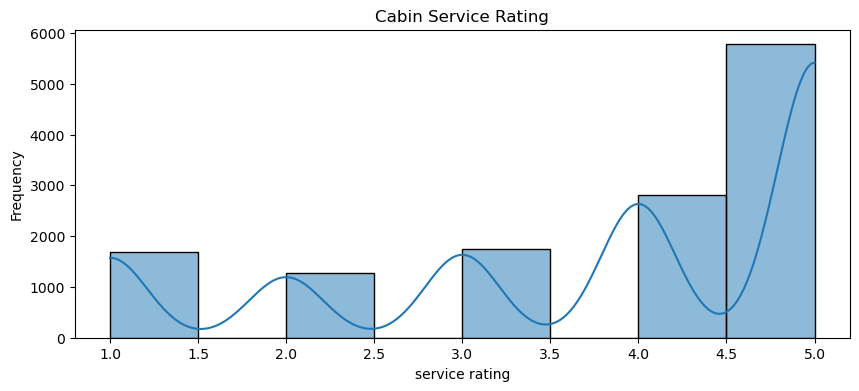

In [37]:
plt.figure(figsize=(10,4))
sns.histplot(df['cabin_service'],kde=True,bins=8)
plt.title("Cabin Service Rating")
plt.xlabel("service rating")
plt.ylabel("Frequency")
plt.show()

#### Observation

Most people gives rating 4 and 5. <br> few people gives rating below 3

### Pie Chart

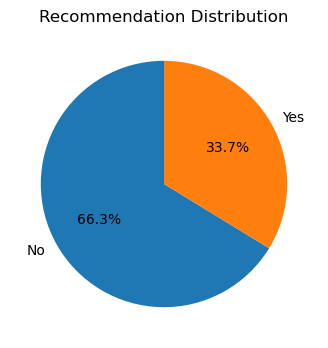

In [41]:
plt.figure(figsize=(10,4))
df['recommended'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'])
plt.title('Recommendation Distribution')
plt.ylabel('')
plt.show()

### Observation

 The pie chart shows the distribution of airline recommendation which interprets that almost 66% of the customers did not recommend the airline while only 33% have recommended it.

### Bar plot

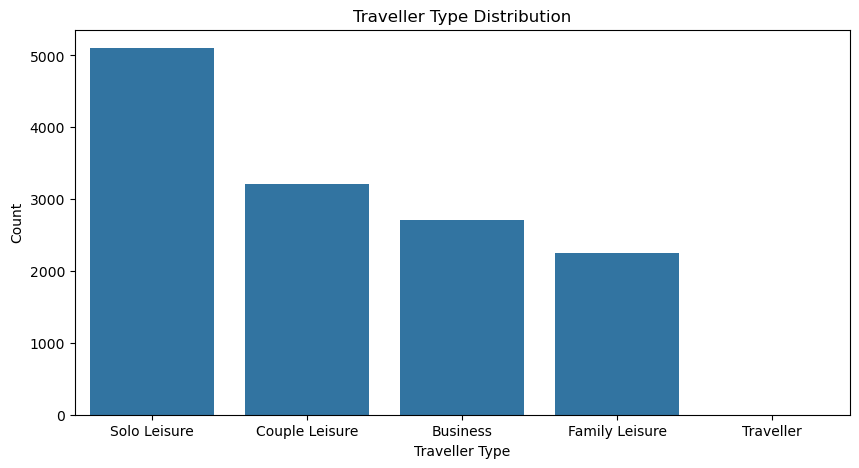

In [45]:
plt.figure(figsize=(10,5))
sns.countplot(x ='traveller_type', data=df, order=df['traveller_type'].value_counts().index)
plt.title("Traveller Type Distribution")
plt.xlabel("Traveller Type")
plt.ylabel("Count")
plt.show()     

### Observation

From the graph we can say majority of travellers are Solo travellers.<br> Then, followed by couple and then business type travellers.<br> Family type travellers are less comparatively to other.

### Bivariate Analysis

### Line graph

In [50]:
yearly_rating = df.groupby('year')['overall'].mean().reset_index()

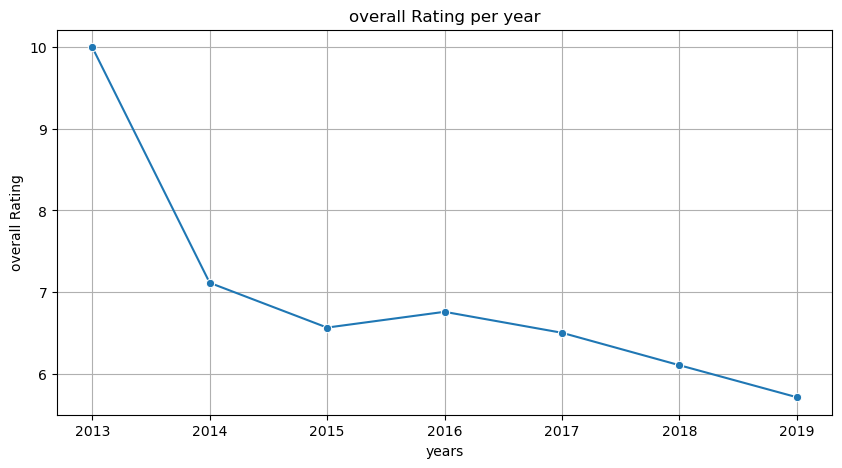

In [51]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year', y='overall', data=yearly_rating, marker='o')
plt.title("overall Rating per year")
plt.xlabel("years")
plt.ylabel("overall Rating")
plt.grid(True)
plt.show()

#### Observation

We can see overall rating are decreasing over the years.<br> After 2013 there is sharp decrease and then gradually decreasing after 2016.

### Bar Plot

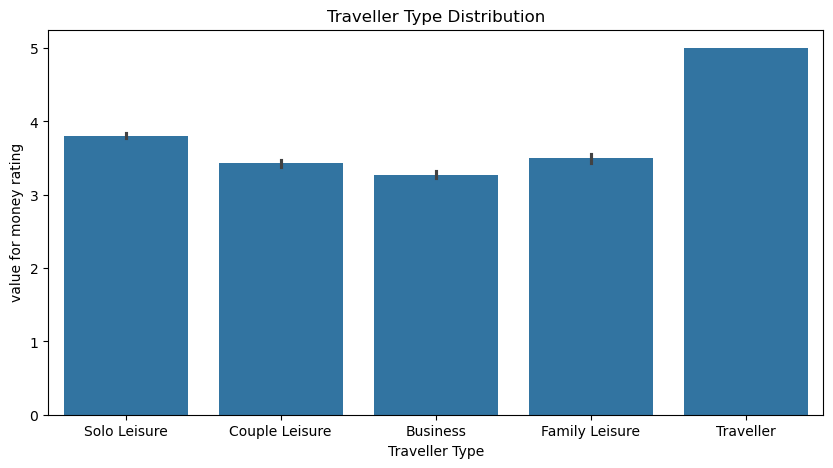

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x='traveller_type',y ='value_for_money', data=df, order=df['traveller_type'].value_counts().index)
plt.title("Traveller Type Distribution")
plt.xlabel("Traveller Type")
plt.ylabel("value for money rating")
plt.show()   

### Observation

Graph shows the rating of 'value for money' given by travellers.<br> It seems bussiness type travellers does not find service value for money. 

### Multivariate Analysis

### Line Graph

In [60]:
sentiment_analysis = df.groupby(['year', 'sentiment'])['value_for_money'].mean().reset_index()

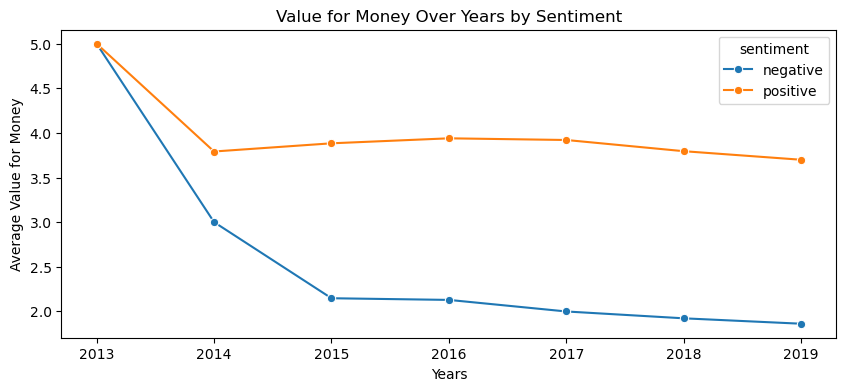

In [61]:
plt.figure(figsize=(10,4))
sns.lineplot(data=sentiment_analysis, x='year', y='value_for_money', hue='sentiment', marker='o')
plt.title('Value for Money Over Years by Sentiment')
plt.xlabel('Years')
plt.ylabel('Average Value for Money')
plt.show()

### Observation

The graph shows positive sentiment suddenly dropped in 2013 to 2014 then constant over a period of time.<br> 
The negative sentiment line has dropped in 2013 to 2015. then slowly decreasing to 2019.

### Bar Plot

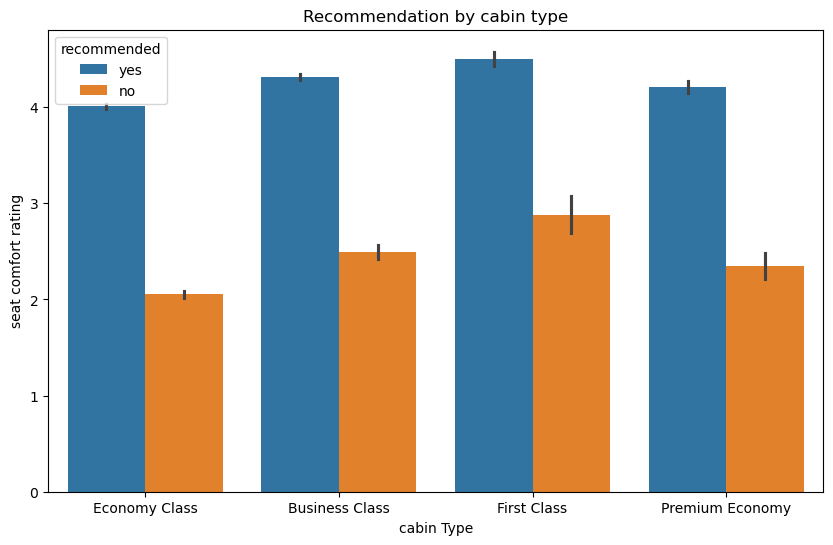

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x='cabin',y='seat_comfort', hue='recommended', data=df) #we use hue as it splits the bars into 2 colours.
plt.title("Recommendation by cabin type")
plt.xlabel("cabin Type")
plt.ylabel("seat comfort rating")
plt.show()
     

### Observation

Graph gives idea of recommendation of cabin type basis on the rating of travellers.<br> the 'First Class' have highest recommendation while economy class have lowest recommendation.

### Correlation

In [69]:
int_dtype =  df.select_dtypes(include = 'int')
int_dtype.head()

,overall,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money
0,10,4,5,5,5,5,5
1,2,3,3,2,3,1,2
2,6,2,3,3,3,3,3
3,1,1,1,1,1,1,1
4,2,1,3,2,2,1,1


<Axes: >

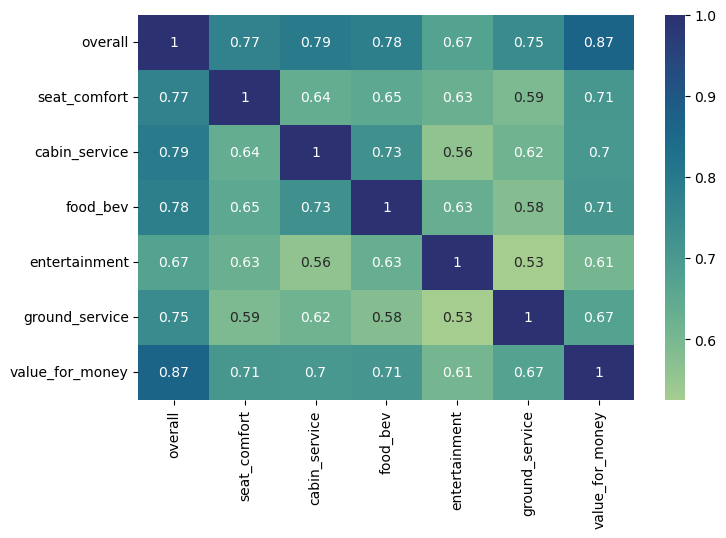

In [70]:
# heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(int_dtype.corr(),annot = True, cmap = "crest")

### Observation

Overall rating is strongly correlated with value for money.<br> Then travellers give priority to services and then seat comfort while giving ratings i.e. overall rating is strongly correlated with cabin services and seat comfort.

### Outlier Detections

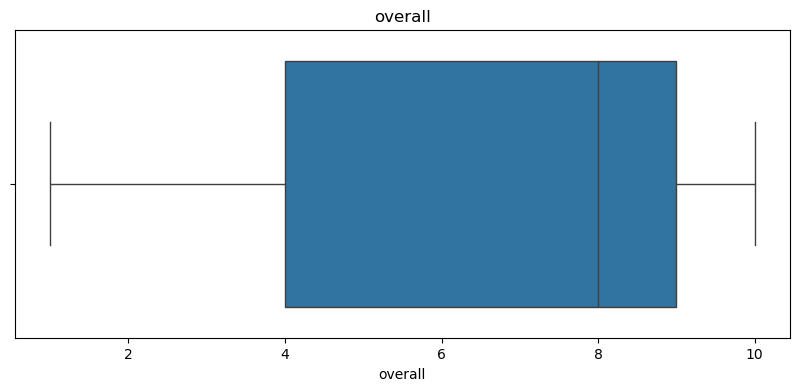

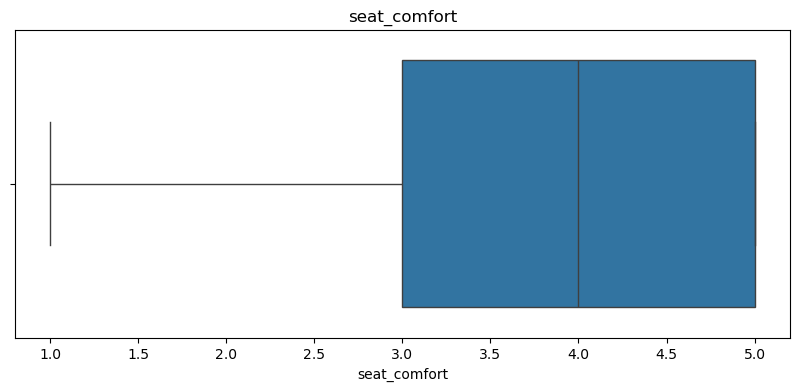

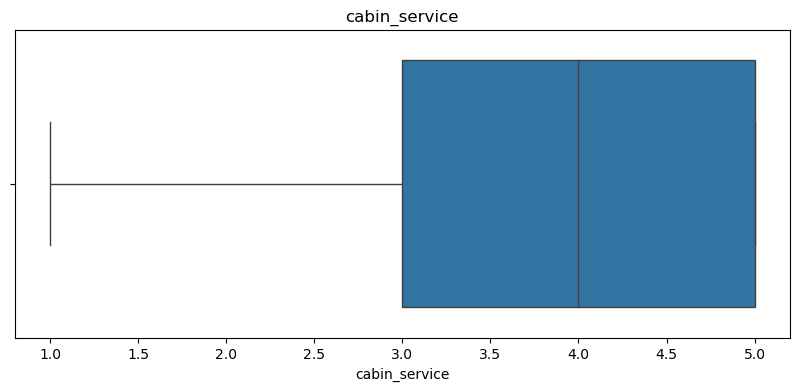

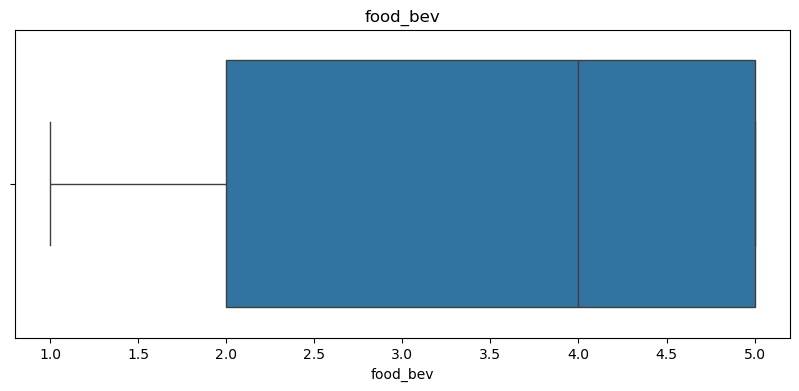

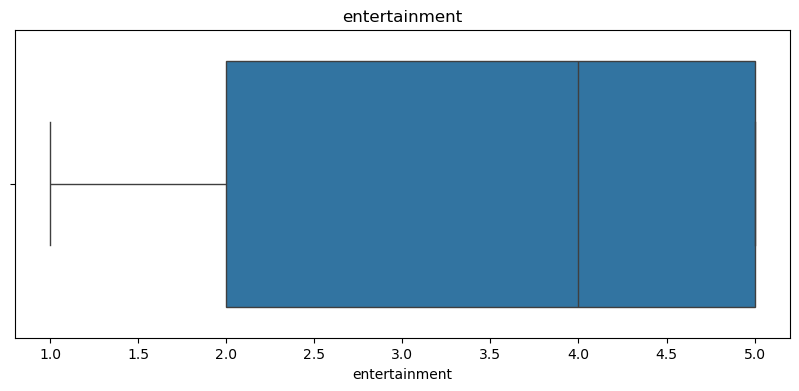

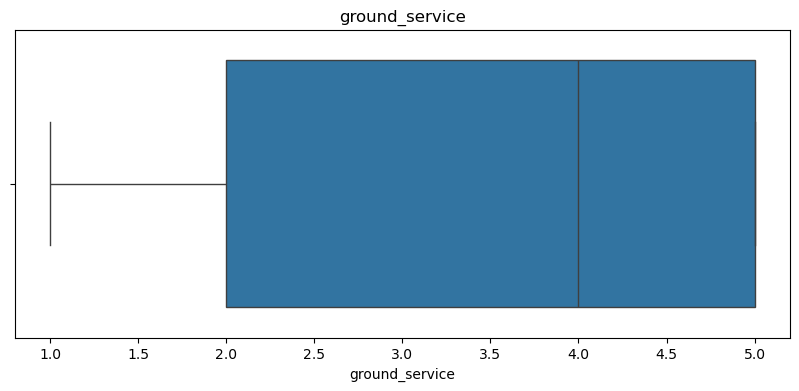

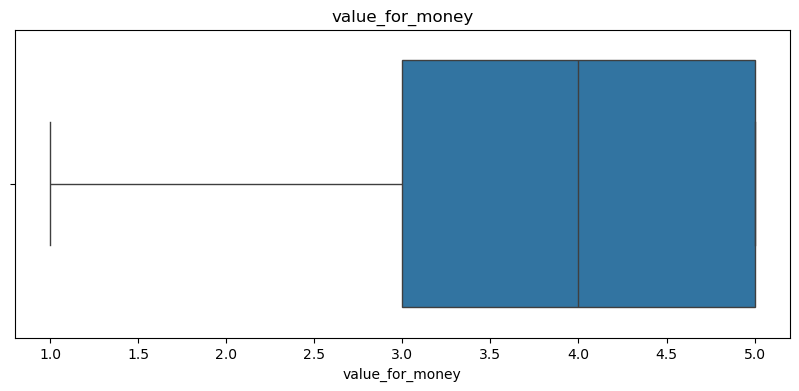

In [74]:
# Boxplot
for i in int_dtype.columns:
    plt.figure(figsize = (10,4))
    sns.boxplot(x=df[i])
    plt.title(i)
    plt.show()

#### Observation

there are no outliers from the above boxplot.

### Label Encoding

In [78]:
# label encoding for recommended column as it contains yes and no
df['recommended'] = df['recommended'].map({'yes': 1, 'no': 0})

In [79]:
df.head()

,airline,overall,review_date,aircraft,traveller_type,cabin,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,value_for_money,recommended,sentiment,year,month
0,Turkish Airlines,10,6th May 2019,A330,Solo Leisure,Economy Class,2019-04-01,4,5,5,5,5,5,1,positive,2019.0,4.0
1,Turkish Airlines,2,29th April 2019,Boeing 737-800 / A330-300,Solo Leisure,Economy Class,2019-04-01,3,3,2,3,1,2,0,positive,2019.0,4.0
2,Turkish Airlines,6,29th April 2019,A320 / Boeing 737,Solo Leisure,Economy Class,2019-04-01,2,3,3,3,3,3,1,positive,2019.0,4.0
3,Turkish Airlines,1,28th April 2019,A320 / A330,Solo Leisure,Economy Class,2019-02-01,1,1,1,1,1,1,0,negative,2019.0,2.0
4,Turkish Airlines,2,24th April 2019,Boeing 777-300,Solo Leisure,Economy Class,2019-03-01,1,3,2,2,1,1,0,positive,2019.0,3.0


### One Hot Encoding

In [81]:
df = pd.get_dummies(df, columns=['sentiment'], drop_first=True)

In [82]:
df = pd.get_dummies(df, columns=['traveller_type'], drop_first=True)

In [83]:
df = pd.get_dummies(df, columns=['cabin'], drop_first=True)

In [84]:
df.head()

,airline,overall,review_date,aircraft,date_flown,seat_comfort,cabin_service,food_bev,entertainment,ground_service,...,year,month,sentiment_positive,traveller_type_Couple Leisure,traveller_type_Family Leisure,traveller_type_Solo Leisure,traveller_type_Traveller,cabin_Economy Class,cabin_First Class,cabin_Premium Economy
0,Turkish Airlines,10,6th May 2019,A330,2019-04-01,4,5,5,5,5,...,2019.0,4.0,True,False,False,True,False,True,False,False
1,Turkish Airlines,2,29th April 2019,Boeing 737-800 / A330-300,2019-04-01,3,3,2,3,1,...,2019.0,4.0,True,False,False,True,False,True,False,False
2,Turkish Airlines,6,29th April 2019,A320 / Boeing 737,2019-04-01,2,3,3,3,3,...,2019.0,4.0,True,False,False,True,False,True,False,False
3,Turkish Airlines,1,28th April 2019,A320 / A330,2019-02-01,1,1,1,1,1,...,2019.0,2.0,False,False,False,True,False,True,False,False
4,Turkish Airlines,2,24th April 2019,Boeing 777-300,2019-03-01,1,3,2,2,1,...,2019.0,3.0,True,False,False,True,False,True,False,False


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13277 entries, 0 to 14214
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   airline                        13277 non-null  object        
 1   overall                        13277 non-null  int32         
 2   review_date                    13277 non-null  object        
 3   aircraft                       13277 non-null  object        
 4   date_flown                     13277 non-null  datetime64[ns]
 5   seat_comfort                   13277 non-null  int32         
 6   cabin_service                  13277 non-null  int32         
 7   food_bev                       13277 non-null  int32         
 8   entertainment                  13277 non-null  int32         
 9   ground_service                 13277 non-null  int32         
 10  value_for_money                13277 non-null  int32         
 11  recommended         

In [86]:
df = df.drop(['review_date','aircraft','date_flown','airline'], axis = 1)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13277 entries, 0 to 14214
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   overall                        13277 non-null  int32  
 1   seat_comfort                   13277 non-null  int32  
 2   cabin_service                  13277 non-null  int32  
 3   food_bev                       13277 non-null  int32  
 4   entertainment                  13277 non-null  int32  
 5   ground_service                 13277 non-null  int32  
 6   value_for_money                13277 non-null  int32  
 7   recommended                    13277 non-null  int64  
 8   year                           13277 non-null  float64
 9   month                          13277 non-null  float64
 10  sentiment_positive             13277 non-null  bool   
 11  traveller_type_Couple Leisure  13277 non-null  bool   
 12  traveller_type_Family Leisure  13277 non-null  bool

In [88]:
df.shape

(13277, 18)

In [89]:
df.isnull().sum()

overall                          0
seat_comfort                     0
cabin_service                    0
food_bev                         0
entertainment                    0
ground_service                   0
value_for_money                  0
recommended                      0
year                             0
month                            0
sentiment_positive               0
traveller_type_Couple Leisure    0
traveller_type_Family Leisure    0
traveller_type_Solo Leisure      0
traveller_type_Traveller         0
cabin_Economy Class              0
cabin_First Class                0
cabin_Premium Economy            0
dtype: int64

## Model Preparation

In [91]:
x = df.drop(['recommended'], axis = 1).values
y = df['recommended'].values

### Train Test Split

In [93]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3)

### Scaling

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [96]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### Importing Logistic Regression

In [98]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
     

In [99]:
log.fit(x_train, y_train)

LogisticRegression()

### Predicting the result

In [101]:
y_pred = log.predict(x_test)
y_pred

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [102]:
y_train

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [103]:
y_test

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [104]:
# Checking the accuracy
print("Training Score: ", log.score(x_train, y_train)*100, "%")
print("Testing Score: ", log.score(x_test, y_test)*100, "%")

Training Score:  95.20068869041214 %
Testing Score:  95.03012048192771 %


### Confusion Metrics

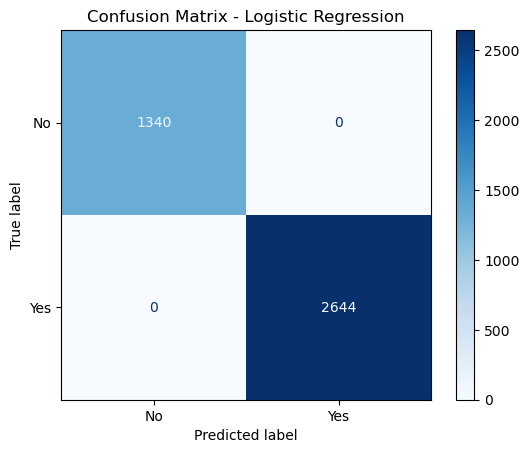

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_test = log.predict(x_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])

disp.plot(cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)

error = 1 - accuracy

precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred)

print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Accuracy       : 1.00
Error Rate     : 0.00
Precision (Yes): 1.00
Recall (Yes)   : 1.00
F1 Score (Yes) : 1.00


### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

print("The Predicted values are: ", dt_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(dt.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(dt.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [0 0 1 ... 1 0 1]
The Actual values are:  [0 0 1 ... 1 0 1]
--------------------------------------------------------------------------------
Training Score:  99.99 %
Testing Score:  94.5 %


### Confusion Metrics

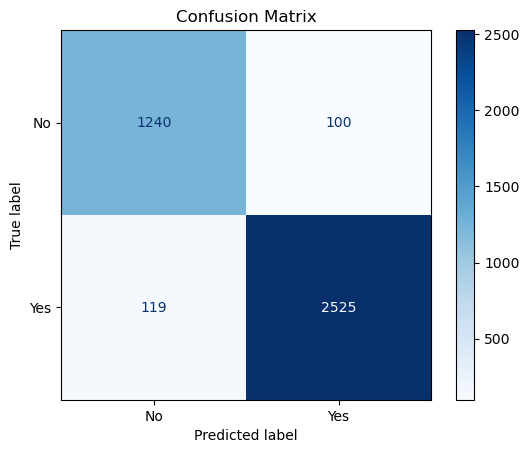

In [111]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, dt_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [112]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, dt_pred)

error = 1 - accuracy

precision = precision_score(y_test, dt_pred)

recall = recall_score(y_test, dt_pred)

f1 = f1_score(y_test, dt_pred)

print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Accuracy       : 0.95
Error Rate     : 0.05
Precision (Yes): 0.96
Recall (Yes)   : 0.95
F1 Score (Yes) : 0.96


### Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

print("The Predicted values are: ", rf_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(rf.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(rf.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [0 0 1 ... 1 0 1]
The Actual values are:  [0 0 1 ... 1 0 1]
--------------------------------------------------------------------------------
Training Score:  99.99 %
Testing Score:  98.07 %


### Confusion Metrics

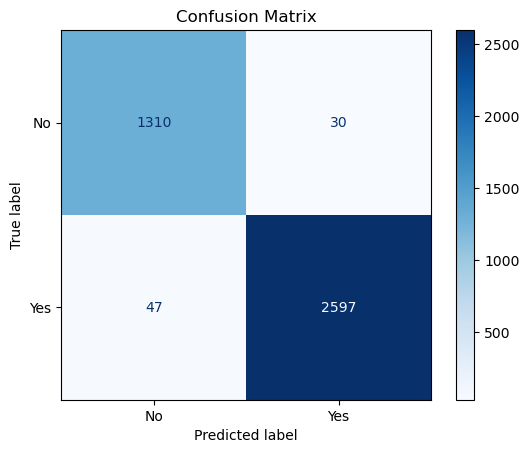

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, rf_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, rf_pred)

error = 1 - accuracy

precision = precision_score(y_test, rf_pred)
recall = recall_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)

print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")

Accuracy       : 0.98
Error Rate     : 0.02
Precision (Yes): 0.99
Recall (Yes)   : 0.98
F1 Score (Yes) : 0.99


### K Nearest Neighbor Classifier

In [119]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [120]:
knn_pred = knn.predict(x_test)
print("The Predicted values are: ", knn_pred)
print("The Actual values are: ", y_test)
print("--" * 40)

print("Training Score: ", round(knn.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(knn.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [0 0 1 ... 1 0 1]
The Actual values are:  [0 0 1 ... 1 0 1]
--------------------------------------------------------------------------------
Training Score:  95.13 %
Testing Score:  95.78 %


### Confusion Metrics

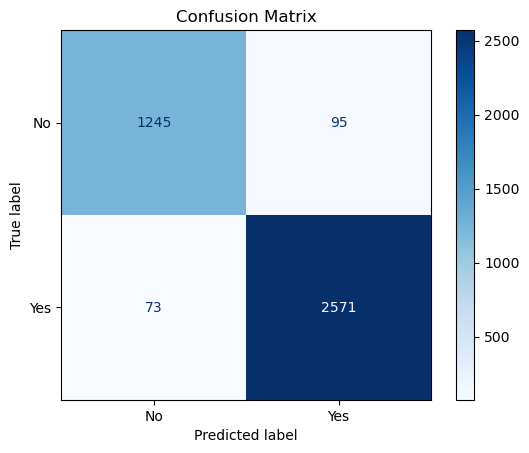

In [122]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No', 'Yes'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [123]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, knn_pred)

error = 1 - accuracy

precision = precision_score(y_test, knn_pred)

recall = recall_score(y_test, knn_pred)

f1 = f1_score(y_test, knn_pred)

print(f"Accuracy       : {accuracy:.2f}")
print(f"Error Rate     : {error:.2f}")
print(f"Precision (Yes): {precision:.2f}")
print(f"Recall (Yes)   : {recall:.2f}")
print(f"F1 Score (Yes) : {f1:.2f}")


Accuracy       : 0.96
Error Rate     : 0.04
Precision (Yes): 0.96
Recall (Yes)   : 0.97
F1 Score (Yes) : 0.97


### Support Vector Machine Classifier

In [125]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)
print("The Predicted values are: ", svm_pred)
print("The Actual values are: ", y_test)
print("--" * 40)
print("Training Score: ", round(svm.score(x_train, y_train)*100,2), "%")
print("Testing Score: ", round(svm.score(x_test, y_test)*100,2), "%")

The Predicted values are:  [0 0 1 ... 1 0 1]
The Actual values are:  [0 0 1 ... 1 0 1]
--------------------------------------------------------------------------------
Training Score:  95.85 %
Testing Score:  98.54 %


### Cross Validation

In [127]:
from sklearn.model_selection import cross_val_score
print("Training",np.mean(cross_val_score(log,x_train,y_train)*100))
print("Testing",np.mean(cross_val_score(log,x_test,y_test)*100))

Training 95.168461578994
Testing 99.42258343158704


### Printing all Scores using DataFrame

In [129]:
all_scores = pd.DataFrame({'Logistic Regression': ((log.score(x_train, y_train))*100, (log.score(x_test, y_test))*100),
                           'Decision Tress Classifier': ((dt.score(x_train, y_train))*100, (dt.score(x_test, y_test))*100),
                           'Random Forest Classifier': ((rf.score(x_train, y_train))*100, (rf.score(x_test, y_test))*100),
                           'Support Vector Machine Classifier': ((svm.score(x_train, y_train))*100, (svm.score(x_test, y_test))*100),
                           'K Nearest Neighbor Classifier': ((knn.score(x_train, y_train))*100, (knn.score(x_test, y_test))*100)})
all_scores.T.rename(columns = {0:'Training Score', 1 : 'Test Score'})
     
     

,Training Score,Test Score
Logistic Regression,95.200689,100.000000
Decision Tress Classifier,99.989239,94.503012
Random Forest Classifier,99.989239,98.067269
Support Vector Machine Classifier,95.846336,98.544177
K Nearest Neighbor Classifier,95.125363,95.783133


### Observation

1.Logistic Regression performs well on both testing data than in training data, makes the model underfit.<br>
2.Decision tree classifier performs good in training data but not on testing data , shows overfitting.<br>
3.Random forest classifier shows good fit and generalization.<br>
4.SVM shows good performance but slightly underfit.<br>
5.Knn indicates balanced accuracy.